In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [16]:
df = pd.read_csv("/content/SolarPrediction.csv")

In [17]:
df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [18]:
median_radiation = df['Radiation'].median()

In [19]:
df['Radiation_Class'] = (df['Radiation'] > median_radiation).astype(int)


X = df[['Temperature', 'Pressure', 'Humidity']]

y = df['Radiation_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Acurácia: {accuracy_dt:.4f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_dt))

Acurácia: 0.8411
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4953
           1       0.87      0.80      0.83      4853

    accuracy                           0.84      9806
   macro avg       0.84      0.84      0.84      9806
weighted avg       0.84      0.84      0.84      9806



In [21]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia: {accuracy_rf:.4f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

Acurácia: 0.8489
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4953
           1       0.87      0.82      0.84      4853

    accuracy                           0.85      9806
   macro avg       0.85      0.85      0.85      9806
weighted avg       0.85      0.85      0.85      9806



In [22]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Acurácia: {accuracy_svm:.4f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_svm))

Acurácia: 0.7850
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      4953
           1       0.86      0.67      0.76      4853

    accuracy                           0.79      9806
   macro avg       0.80      0.78      0.78      9806
weighted avg       0.80      0.79      0.78      9806



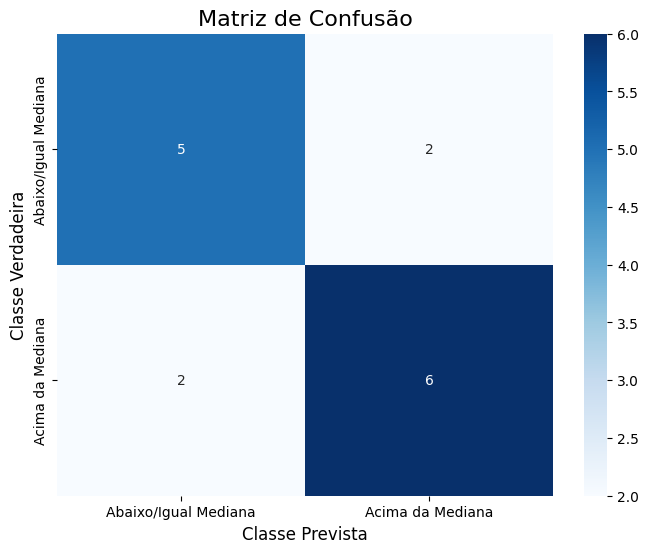

In [24]:
y_test = np.array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1])
y_pred = np.array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])


cm = confusion_matrix(y_test, y_pred)

labels = ['Abaixo/Igual Mediana', 'Acima da Mediana']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão', fontsize=16)
plt.ylabel('Classe Verdadeira', fontsize=12)
plt.xlabel('Classe Prevista', fontsize=12)

plt.show()

In [27]:
data = {
    'UNIXTime': pd.to_datetime(['2025-09-18 20:00:00', '2025-09-18 21:00:00']*50).astype(int) // 10**9,
    'Data': ['9/18/2025']*100,
    'Time': [f'{h}:{m:02d}:00' for h in range(10) for m in range(10)],
    'Radiation': np.random.rand(100) * 800,
    'Temperature': np.random.normal(25, 5, 100),
    'Pressure': np.random.normal(1013, 10, 100),
    'Humidity': np.random.normal(50, 15, 100),
    'WindDirection(Degrees)': np.random.randint(0, 360, 100),
    'Speed': np.random.normal(10, 5, 100),
    'TimeSunRise': ['06:00:00']*100,
    'TimeSunSet': ['18:00:00']*100
}
df = pd.DataFrame(data)


df['datetime'] = pd.to_datetime(df['Data'] + ' ' + df['Time'], dayfirst=False)

df['hora_do_dia'] = df['datetime'].dt.hour
df['dia_da_semana'] = df['datetime'].dt.dayofweek

y = df['Radiation']

X = df.drop(columns=['Radiation', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet', 'datetime'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
models = {
    "Regressão Linear": LinearRegression(),
    "Árvore de Regressão": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results[name] = {
        'R²': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

results_df = pd.DataFrame(results).T.sort_values(by='R²', ascending=False)

print("--- Desempenho dos Modelos de Regressão (Prevendo Radiação) ---")
print(results_df)


--- Desempenho dos Modelos de Regressão (Prevendo Radiação) ---
                               R²         MAE        RMSE
Random Forest Regressor -0.062727  226.552397  265.905253
Regressão Linear        -0.100698  235.347048  270.614016
Árvore de Regressão     -0.768181  268.246469  342.988447
